# Experiments in the Section 4.1 (Choosing Tuning Parameters K and J).

### Csv to load figures are already here. To rerun the entire experiment, you have to run the three following files: K_impac_premier.py, K_impact_deux.py and rankrank.py. These three .py files take some hours to be computed. They will automatically write the csv files in the same folder and then you can rerun this notebook to check the results.

### Here you can run the entire notebook.

## Importing libraries:

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import pandas as pd
from multiprocessing import Pool
from functools import partial
from itertools import combinations
import csv
import warnings
warnings.filterwarnings("ignore")
import FCHD
import os

# The choice of K:

In [2]:
A = pd.read_csv('impact_K_deux.csv', header= None)
A = A.as_matrix()
# first curve :
A1 = A[:8].T
A2 = A[8:16].T
A3 = A[16:24].T

#second curve :

A4 = A[24:32].T
A5 = A[32:40].T
A6 = A[40:48].T

In [3]:
B = pd.read_csv('impact_K_premier.csv', header= None)
B = B.as_matrix()
# first curve :
B1 = B[1:,:10]
B2 = B[1:,20:30]
B3 = B[1:,40:50]

real_j2 = B[0,0]
real_j3 = B[0,20]
real_j4 = B[0,40]
#second curve :

B4 = B[1:,10:20]
B5 = B[1:,30:40]
B6 = B[1:,50:]

real2_j2 = B[0,10]
real2_j3 = B[0,30]
real2_j4 = B[0,50]

In [4]:
def plotboxplot_K(A,B,C, ticks):
    s = 0.2
    bp1 = plt.boxplot(B, vert = True, 
                widths = np.array([s, s, s, s, s, s, s, s, s, s]),
                patch_artist = False, notch = False
                ,positions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] )
    c1 = "blue"
    for item in ['boxes','whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp1[item], color=c1)

    #plt.setp(bp1["boxes"], facecolor=c1)
    plt.setp(bp1["fliers"], markeredgecolor=c1)


    bp2 = plt.boxplot(C,  vert = True, 
                widths = np.array([s, s, s, s, s, s, s, s, s, s]),
                patch_artist = False, notch = False
                ,positions = [1.20,2.2,3.2,4.2,5.2,6.2,7.2, 8.2, 9.2, 10.2] )
    c2 = "green"
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp2[item], color=c2)
    #plt.setp(bp2["boxes"], facecolor=c2)
    plt.setp(bp2["fliers"], markeredgecolor=c2)
    
    bp3 = plt.boxplot(A,  vert = True, 
                widths = np.array([s, s, s, s, s, s, s, s, s, s]),
                patch_artist = False, notch = False
                ,positions = [0.85, 1.85, 2.85, 3.85, 4.85, 5.85, 6.85, 7.85, 8.85, 9.85] )
    c3 = "red"
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp3[item], color=c3)
    #plt.setp(bp3["boxes"], facecolor=c3)
    plt.setp(bp3["fliers"], markeredgecolor=c3)
    
    
    
    
    plt.xlim(0.5,10.5)
    plt.legend([ bp3["boxes"][0], bp1["boxes"][0], bp2["boxes"][0]], ['J = 2', 'J = 3','J = 4'], 
               fontsize= "xx-large" )

    plt.xticks(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),ticks)


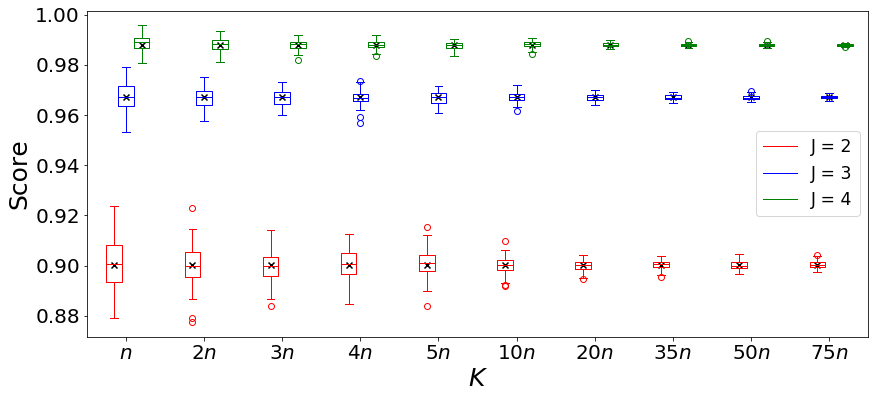

In [5]:
plt.figure(figsize=(14,6))
ticks = ['$n$', '2$n$', '3$n$', '4$n$', '5$n$', '10$n$', '20$n$', '35$n$', '50$n$', '75$n$']
plotboxplot_K(B1,B2,B3,ticks)
plt.scatter(np.arange(10) + 0.85, np.repeat(real_j2,10), marker='x', linewidths=0.6, c='black')
plt.scatter(np.arange(10) + 1, np.repeat(real_j3,10), marker='x', linewidths=0.6, c='black')
plt.scatter(np.arange(10) + 1.20, np.repeat(real_j4,10), marker='x', linewidths=0.6, c='black')

plt.ylabel('Score', size = 25)
plt.xlabel('$K$', size = 25)
plt.tick_params(labelsize=20)


plt.show()

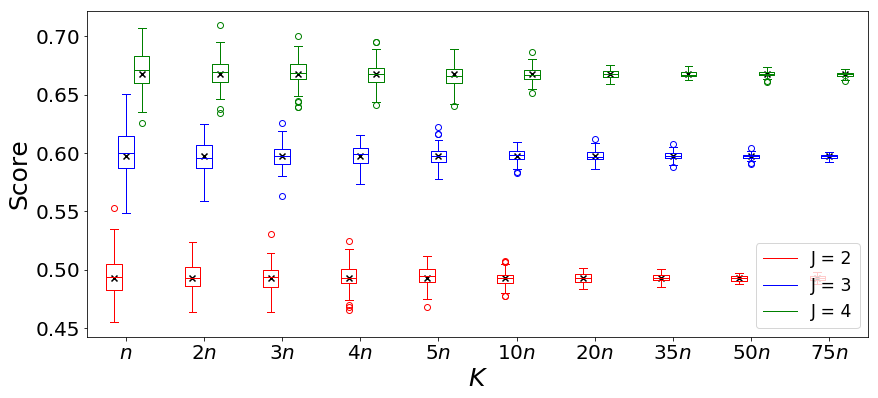

In [6]:
plt.figure(figsize=(14,6))
ticks = ['$n$', '2$n$', '3$n$', '4$n$', '5$n$', '10$n$', '20$n$', '35$n$', '50$n$', '75$n$']
plotboxplot_K(B4,B5,B6,ticks)
plt.scatter(np.arange(10) + 0.85, np.repeat(real2_j2,10), marker='x', linewidths=0.6, c='black')
plt.scatter(np.arange(10) + 1, np.repeat(real2_j3,10), marker='x', linewidths=0.6, c='black')
plt.scatter(np.arange(10) + 1.20, np.repeat(real2_j4,10), marker='x', linewidths=0.6, c='black')

plt.ylabel('Score', size = 25)
plt.xlabel('$K$', size = 25)
plt.tick_params(labelsize=20)

plt.show()

# The Rank-Rank plot:


In [7]:
S = pd.read_csv('Rankrank_score.csv', header=None)
S_mat = S.as_matrix()

In [8]:
Rank = np.zeros((6, 104))
for i in range(6):
    Rank[i, np.argsort(S_mat[i])] = np.arange(104)

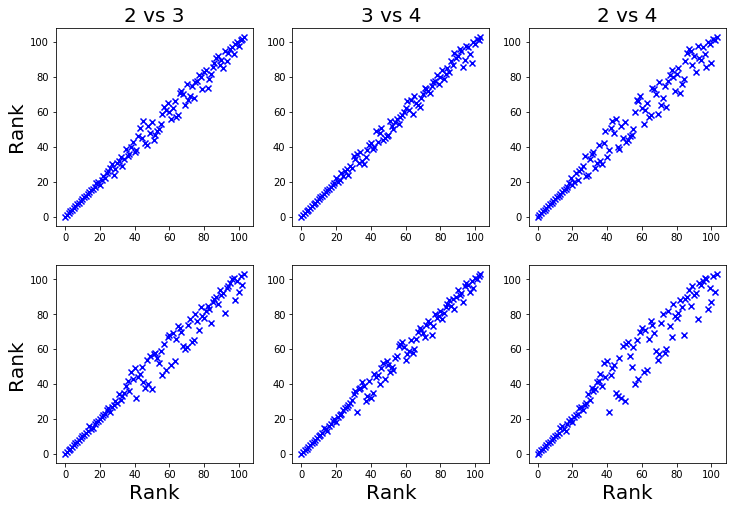

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.title('2 vs 3', size=20)
plt.ylabel('Rank', size=20)
plt.scatter(Rank[0], Rank[1],  marker='x',c='b')
plt.subplot(232)
plt.title('3 vs 4', size=20)
plt.scatter(Rank[1], Rank[2],  marker='x',c='b')
plt.subplot(233)
plt.title('2 vs 4', size=20)
plt.scatter(Rank[0], Rank[2], marker='x',c='b')
plt.subplot(234)
plt.xlabel('Rank', size=20)
plt.ylabel('Rank', size=20)
plt.scatter(Rank[3], Rank[4],  marker='x',c='b')
plt.subplot(235)
plt.xlabel('Rank', size=20)
plt.scatter(Rank[4], Rank[5],  marker='x',c='b')
plt.subplot(236)
plt.xlabel('Rank', size=20)
plt.scatter(Rank[3], Rank[5], marker='x',c='b')